<a href="https://colab.research.google.com/github/Ravi-shankar100/GRIP-Tasks/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Linear Regression

In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Reading the data
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isnull().sum()
#There are 0 null values

Hours     0
Scores    0
dtype: int64

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##Data Visualization

<Figure size 720x576 with 0 Axes>

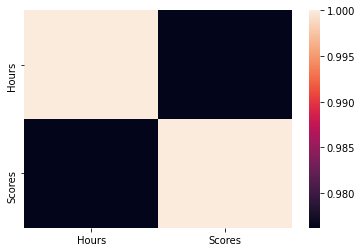

<Figure size 720x576 with 0 Axes>

In [ ]:
sns.heatmap(data.corr())
plt.figure(figsize= (10,8))

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


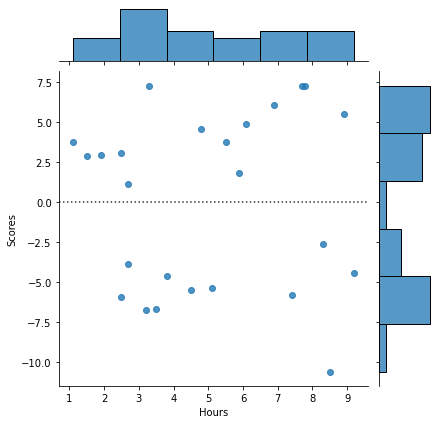

In [ ]:
sns.jointplot(x = "Hours",y = "Scores",data = data,kind= "resid")

From the above plot we say that the residual doesnt have constant variance

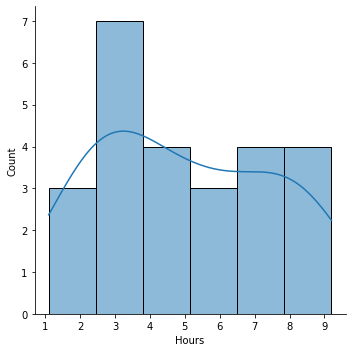

In [ ]:
sns.displot(data["Hours"],kde = True)

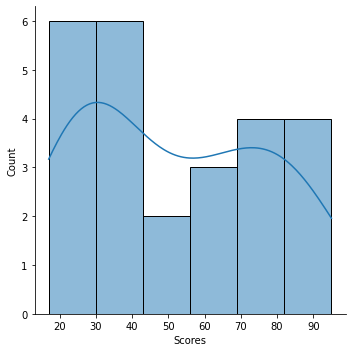

In [ ]:
sns.displot(data["Scores"],kde = True)

The above two plots talks about distributions and frequency of Hours and Score obtained

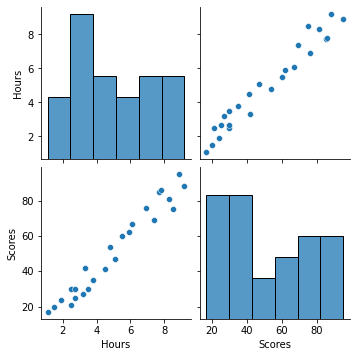

In [ ]:
sns.pairplot(data)

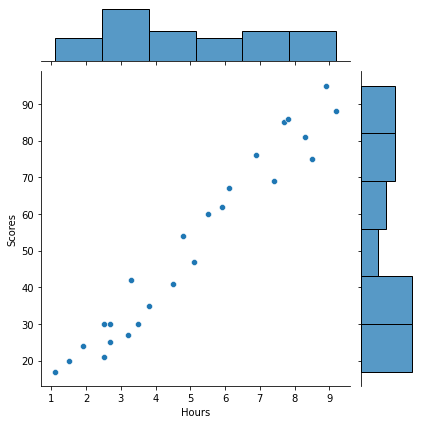

In [ ]:
sns.jointplot(x = "Hours",y = "Scores",data = data,kind= "scatter")

From the above plot we can say that there is positive coorelation between the 2 variables Hours Studied and Score obtained
Scores are depenedent on number of hours and this can be said from above plot

Text(0.5, 1.0, 'Box plot')

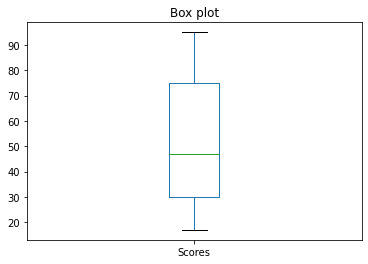

In [ ]:
#Box plot for the Scores data
data["Scores"].plot(kind = "box")
plt.title("Box plot")

Text(0.5, 1.0, 'Box plot')

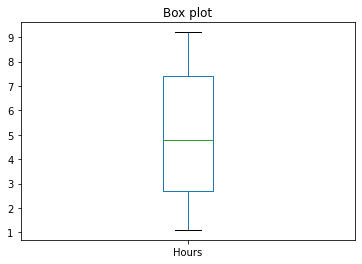

In [ ]:
#Box plot for the Scores data
data["Hours"].plot(kind = "box")
plt.title("Box plot")

##Getting X and Y data

In [ ]:
#Getting the Independent and dependent features
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
y = y.reshape(-1,1)
y.shape

(25, 1)

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.16,random_state = 60)

##Linear Regression Model

In [ ]:
#Training the Algorithm

from sklearn.linear_model import LinearRegression

predictor = LinearRegression()
predictor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#The Regression Line Equation
equation = predictor.intercept_ + predictor.coef_*X

In [ ]:
#Predictions on the test data

y_pred = predictor.predict(X_test)
y_pred

array([[13.16037303],
       [28.81605598],
       [60.1274219 ],
       [26.85909562]])

In [ ]:
#Compare Actual vs Predicted

y_pred_round = np.round(y_pred,2)
compare = pd.DataFrame({"Original" : list(y_test),
                        "Predicted" : list(y_pred_round)},columns = ["Original","Predicted"])
compare

,Original,Predicted
0,[17],[13.16]
1,[30],[28.82]
2,[62],[60.13]
3,[21],[26.86]


Text(0, 0.5, 'Predicted Values')

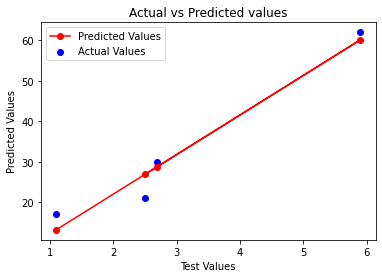

In [ ]:
plt.scatter(X_test,y_test,label = "Actual Values",marker = "o",color = "blue")
plt.plot(X_test,y_pred,label = "Predicted Values",marker = "o",color = "red")
plt.title("Actual vs Predicted values")
plt.legend()
plt.xlabel("Test Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Scores')

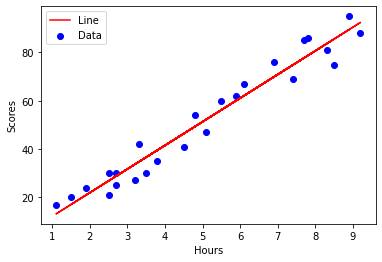

In [ ]:
plt.scatter(X,y,c= "b",label = "Data")
plt.plot(X,equation,c= "r",label = "Line")
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Scores")

##Metrics used for this problem
##MSE, RMSE, MAE, R_2

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [ ]:
print("R^2 value is: ",r2_score(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

R^2 value is:  0.9567814180253774
Mean Absolute Error: 3.188811175202198
Mean Squared Error:  13.495002221575916
Root Mean Squared Error:  3.6735544397185564


In [ ]:
#Test with the given data point

hours = np.array(9.25).reshape(-1,1)

prediction = predictor.predict(hours.reshape(-1,1))

print("The Predicted Score for {} hours study is {}".format(hours,prediction))

The Predicted Score for [[9.25]] hours study is [[92.9065081]]


##The analysis is if person studies for 9.25 hours then predicted score is 92.91